# Data Acquisition

### Why is Machine Learning Difficult?

- The answer is that the data that required to train computers is most of the times **not available**.
- And in other cases, data is in **a very raw format that requires a lot of cleaning and feature engineering**.

### What are some common ways to collect data?

1. Collection from an publicly available data repository (files). ✅
2. Web APIs (JSON)
3. Scraping a website (check for legality).
4. Databases (SQL / NoSQL)

# Problem Statement: How to get all tweets with a tag `omicron`?
Get all the tweet for from twitter talking about `#omicron `

`Transition question`: **Does Twitter offer some sort of service that allows to query data in this manner?**

## WWW


The World Wide Web is about communication between web clients and web servers.

Clients are often browsers (Chrome, Edge, Safari), but they can be any type of program or device.

Servers are most often computers in the cloud.



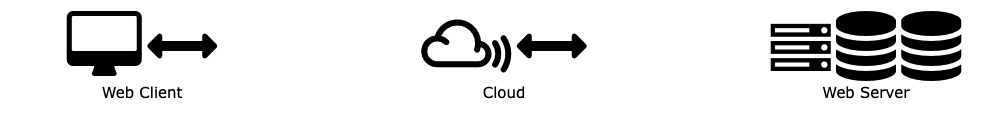



## HTTP Request / Response
Communication between clients and servers is done by requests and responses:

A client (a browser) sends an HTTP request to the web
A web server receives the request
The server runs an application to process the request
The server returns an HTTP response (output) to the browser
The client (the browser) receives the response


## The HTTP Request Circle

A typical HTTP request / response circle:

The browser requests an HTML page. The server returns an HTML file.
The browser requests a style sheet. The server returns a CSS file.
The browser requests an JPG image. The server returns a JPG file.
The browser requests JavaScript code. The server returns a JS file
The browser requests data. The server returns data (in XML or JSON).

## The GET Method
GET is used to request data from a specified resource.

Note that the query string (name/value pairs) is sent in the URL of a GET request:

`/test/demo_form.php?name1=value1&name2=value2`

**Some notes on GET requests:**

- GET requests can be cached
- GET requests remain in the browser history
- GET requests can be bookmarked
- GET requests should never be used when dealing with sensitive data
- GET requests have length restrictions
- GET requests are only used to request data (not modify)


## The POST Method
POST is used to send data to a server to create/update a resource.

The data sent to the server with POST is stored in the request body of the HTTP request:

```python
POST /test/demo_form.php HTTP/1.1
Host: w3schools.com

name1=value1&name2=value2
```

**Some notes on POST requests:**

- POST requests are never cached
- POST requests do not remain in the browser history
- POST requests cannot be bookmarked
- POST requests have no restrictions on data length

# What is an API?
Application Programming Interface (API), is a software that allows two applications to talk to each other (exchanging the data). Each time you check the weather on your phone, or using a Google Service, you're using an API.

**APIs are just like the function calls, but those functions are sitting on the web server and API is the way to invoke those functions in your program**.
1. We can send a request to the web server (to its API) to get the data.
2. In return if the call is successfully made the API returns us the data mostly in the **`json` format**.

There are some websites or APIs those offers are open to all and provide free data. Whereas mostly APIs are paid and require some sort of Authentication with the API Keys.

### Use cases of APIs:
- APIs can be used to call a function on web server to perform a task and return the required response.
- APIs can also be used to get/send the data over the internet.


Let's first look at few free web APIs and then we will explore paid web api.



## How to make these API calls?

Number of things that you should know while making a request on the web:
1. Protocol - HTTP
2. Authentication credentials for the API being called.
3. Functional requirements of the API (URL for the endpoint) - parameters, syntax, and sample response structure (is it JSON or something else) - using the language of your choice.
4. [Optional]: Are there 3rd party solutions available to make these requests easy? - e.g.: `yahoofinance`, `tweepy`



#### 1. How to send an HTTP request using Python?

**requests** package

In [33]:
# !pip install requests

In [34]:
import requests
import json

### Get Public IP address - Know your IP address
Another open Web API is to know your public IP Address. Try calling https://api.ipify.org this URL from the address bar of your browser.

In [35]:
url = "https://api.ipify.org"

In [36]:
response = requests.get(url)

In [37]:
response.status_code

200

In [38]:
response.text

'223.190.80.1'

## Coming back to our task: Getting `Omicron`-tagged tweets using Twitter Search API

Getting tweets tagged Omicron from the Twitter.

1. Set up a project on Twitter Developer API.
2. Create a new app.

In [39]:
 !pip install tweepy

## API v2

- API link: https://developer.twitter.com/en/docs/twitter-api/tweets/search/introduction
- Fields to extract: https://developer.twitter.com/en/docs/twitter-api/data-dictionary/object-model/tweet

### Authenticate yourself using the bearer token

In [40]:
import tweepy

##add your bearer token
client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAPPSYwEAAAAARlorVWosZZfuZs5m7xGT8uzk9yQ%3DeAdNOA2H4VKQQezv2SQK4sqP9B3c3ViUMHibevOG7dkATAKR3b')



## Extract tweets from an account

In [41]:
query = 'from:scaler_official -is:retweet'


tweets = client.search_recent_tweets(query=query, tweet_fields = ['created_at', 'author_id'], 
                                     max_results=100)

print(len(tweets.data))




38


In [42]:
for tweet in tweets.data:
    print(tweet.text)
    print(tweet.author_id)
    print('---------')

"Sorry sir, we've canceled your flight. Please accept a gift card worth $$$." But why? 😤 
The reason usually is OVERBOOKING.

Here's a peep at EP 4 of #DataBro, where Guru shows how data plays a big role in overbooked flights. 

#SCALEROriginals @thejordindian https://t.co/hz7hJaBGKQ
1194875574331699200
---------
Try these tips at your next #hackathon!

Comment below if you have more useful tips👇

#CreateImpact
1194875574331699200
---------
Takeaways from Saumya's hackathon preparation💯 https://t.co/wsV0sG9Xes
1194875574331699200
---------
Insightful hacks for hackathon🧠 https://t.co/zTwG0RzoIS
1194875574331699200
---------
How did hackathons help @saumya1singh?💻 https://t.co/k6YlzR1pXu
1194875574331699200
---------
Are third-party libraries allowed in hackathons❓ https://t.co/DnqocLMJJG
1194875574331699200
---------
Go team or go solo? 🤔 https://t.co/Ks17Ka7ZN4
1194875574331699200
---------
3️⃣ takeaways from hackathons- https://t.co/w9CdjKyg3L
1194875574331699200
---------
Saumya Sin

In [43]:
##. getting twitter user id from username
client.get_user(username="elonmusk")

Response(data=<User id=44196397 name=Elon Musk username=elonmusk>, includes={}, errors=[], meta={})

In [44]:
## get the following list of Elon Musk

fol_ing_list = client.get_users_following(id="44196397")
len(fol_ing_list.data)



100

In [45]:
fol_ing_list.data[0]

<User id=1524407286910930944 name=The Cultural Tutor username=culturaltutor>

In [46]:
query = "#omicron -is:retweet"

data = {
    'text': [],
    'created_at': [],
    'author_id': []
}


for tweet in tweepy.Paginator(client.search_recent_tweets, query=query,
                             tweet_fields=['created_at', 'author_id']).flatten(1000):
    data['text'].append(tweet.text)
    data['created_at'].append(tweet.created_at)
    data['author_id'].append(tweet.author_id)



In [47]:
len(data['text'])

1000

In [48]:
import pandas as pd

df = pd.DataFrame(data)
df.head()

,text,created_at,author_id
0,#COVID19 Daily global cases fell after a spike...,2022-09-03 08:41:42+00:00,1202820866595123200
1,Reassuring news about #SARSCoV2 #omicron BA.4 ...,2022-09-03 08:35:28+00:00,1184232077933383682
2,The official cited the situation in #India as ...,2022-09-03 08:32:02+00:00,834013638323224576
3,"""According to the data, #Europe is still exper...",2022-09-03 08:31:59+00:00,834013638323224576
4,The latest The Creativeworld Dave Daily! https...,2022-09-03 08:28:16+00:00,168617320


In [49]:
df.to_csv("tweets.csv", index=False)

### Extract tweets from an account

In [50]:
# Replace with your own search query
query = 'from:scaler_official -is:retweet'

tweets = client.search_recent_tweets(query=query, tweet_fields=['created_at', 'author_id'], max_results=100)

print(len(tweets.data))
print("==========")

for tweet in tweets.data:
    print(tweet.text)
    print("--------")
    if len(tweet.context_annotations) > 0:
        print(tweet.author_id)

38
"Sorry sir, we've canceled your flight. Please accept a gift card worth $$$." But why? 😤 
The reason usually is OVERBOOKING.

Here's a peep at EP 4 of #DataBro, where Guru shows how data plays a big role in overbooked flights. 

#SCALEROriginals @thejordindian https://t.co/hz7hJaBGKQ
--------
Try these tips at your next #hackathon!

Comment below if you have more useful tips👇

#CreateImpact
--------
Takeaways from Saumya's hackathon preparation💯 https://t.co/wsV0sG9Xes
--------
Insightful hacks for hackathon🧠 https://t.co/zTwG0RzoIS
--------
How did hackathons help @saumya1singh?💻 https://t.co/k6YlzR1pXu
--------
Are third-party libraries allowed in hackathons❓ https://t.co/DnqocLMJJG
--------
Go team or go solo? 🤔 https://t.co/Ks17Ka7ZN4
--------
3️⃣ takeaways from hackathons- https://t.co/w9CdjKyg3L
--------
Saumya Singh ( @saumya1singh ), Associate Software Engineer at Red Hat and the winner of the Smart India Hackathon, is here to give you some exclusive insights on how you shou

In [51]:
## get ID from the username
client.get_user(username="elonmusk")





Response(data=<User id=44196397 name=Elon Musk username=elonmusk>, includes={}, errors=[], meta={})

In [52]:
## get users that I am following
client.get_users_following(id="709107001926615040")


Response(data=[<User id=38899543 name=Chrisman username=chrismanfrank>, <User id=1345707144943906816 name=Vaibhav Domkundwar username=vaibhavbetter>, <User id=1450424698853072897 name=Alex Mathers username=Alexmathers84>, <User id=965699949512900608 name=Clint Murphy username=IAmClintMurphy>, <User id=360254234 name=JK MOLINA username=OneJKMolina>, <User id=1435768999187558400 name=Joe Portsmouth 🧲 username=joe_portsmouth>, <User id=1511333035 name=Andrew Gazdecki username=agazdecki>, <User id=343990983 name=Arvid Kahl username=arvidkahl>, <User id=920321515077414912 name=Readwise username=readwise>, <User id=2722375254 name=Charlotte Crowther 🕸 username=CharlotCrowther>, <User id=1245260977626587136 name=Jay Alammar username=JayAlammar>, <User id=544816363 name=Naman Bhalla username=Naman_Bhalla>, <User id=1291505170581319680 name=Synthesis username=synthesischool>, <User id=14826955 name=Abhimanyu Saxena username=asxna>, <User id=1191207924 name=Erik Bernhardsson username=bernhardsso

### Query tweets with tag - Omicron 

In [53]:
# Replace with your own search query
query = '#omicron'

data = {'text': [],
        'created_at': [],
        'author_id': []}

# Replace the limit=1000 with the maximum number of Tweets you want
for tweet in tweepy.Paginator(client.search_recent_tweets, query=query,
                              tweet_fields=['context_annotations', 'created_at', 'author_id']).flatten(limit=1000):
    data['text'].append(tweet.text)
    data['created_at'].append(tweet.created_at)
    data['author_id'].append(tweet.author_id)

print(data)

{'text': ['#COVID19 Daily global cases fell after a spike in the spring but are now rising again, with the emergence of the BA.4 and BA.5 subvariants of the #Omicron variant. https://t.co/EDIMWykytZ', 'Reassuring news about #SARSCoV2 #omicron BA.4 and BA.5 infections in England: \n\n“There was no evidence of reduced vaccine effectiveness against hospitalisation for BA.4 or BA.5 as compared to BA.2”\n\nPreprint from our team @UKHSA 👉 https://t.co/ePmhr71lu1\n\nMore details here 👇 https://t.co/aAkbItKcgv', 'The official cited the situation in #India as an example, where the #Omicron subvariant BA2.75 is spreading faster than other variants, according to a media report. https://t.co/NSk2ayV1rj', '"According to the data, #Europe is still experiencing the circulation of the #Omicron BA.5 variant, although the peak of the summer wave was a few weeks ago in many of the member states," said Marco Cavaleri, Head of the EMA\'s health threats and vaccines strategy. https://t.co/3OvCPFO7RG', 'The 

In [54]:
import pandas as pd
df = pd.DataFrame(data)
df.head()

,text,created_at,author_id
0,#COVID19 Daily global cases fell after a spike...,2022-09-03 08:41:42+00:00,1202820866595123200
1,Reassuring news about #SARSCoV2 #omicron BA.4 ...,2022-09-03 08:35:28+00:00,1184232077933383682
2,The official cited the situation in #India as ...,2022-09-03 08:32:02+00:00,834013638323224576
3,"""According to the data, #Europe is still exper...",2022-09-03 08:31:59+00:00,834013638323224576
4,The latest The Creativeworld Dave Daily! https...,2022-09-03 08:28:16+00:00,168617320


### Writing to a file

In [55]:
df.to_csv('./sample_tweets.csv', index=False)

---

## Getting the Universities Data
This is the first type of API where just by calling the API (http://universities.hipolabs.com) as it is will not give the data. We need to provide the further more infromation to the API Something like what we do while calling functions i.e. - passing the parameters.\
Here we will pass query parameters while calling the API.

URL = http://universities.hipolabs.com/search?name=Amity&country=India. We can pass the name and the country

In [56]:
url = "http://universities.hipolabs.com/search?name=Amity&country=India"

In [57]:
response = requests.get(url)

In [58]:
response.status_code

200

In [59]:
amity = json.loads(response.text)

In [60]:
amity

[{'domains': ['amity.edu'],
  'alpha_two_code': 'IN',
  'country': 'India',
  'web_pages': ['http://www.amity.edu/'],
  'name': 'Amity University',
  'state-province': None}]

If we want to get all the universities of India, we can skip the name parameter and just provide the country=India\
http://universities.hipolabs.com/search?country=India

In [61]:
url = "http://universities.hipolabs.com/search?country=India"

In [62]:
response = requests.get(url)
print(response.status_code)
countries = json.loads(response.text)

200


In [63]:
# Got a list of Universities
type(countries)

list

In [64]:
# There are total of 800 university data.
len(countries)

806

In [65]:
countries[:5]

[{'domains': ['upes.ac.in'],
  'alpha_two_code': 'IN',
  'country': 'India',
  'web_pages': ['https://www.upes.ac.in/'],
  'name': 'University of Petroleum and Energy Studies',
  'state-province': 'Dehradun'},
 {'domains': ['davietjal.org'],
  'alpha_two_code': 'IN',
  'country': 'India',
  'web_pages': ['http://www.davietjal.org/'],
  'name': 'DAV Institute of Engineering & Technology',
  'state-province': 'Punjab'},
 {'domains': ['lpu.in'],
  'alpha_two_code': 'IN',
  'country': 'India',
  'web_pages': ['http://www.lpu.in/'],
  'name': 'Lovely Professional University',
  'state-province': 'Punjab'},
 {'domains': ['somaiya.edu'],
  'alpha_two_code': 'IN',
  'country': 'India',
  'web_pages': ['https://somaiya.edu/'],
  'name': 'Somaiya Vidyavihar',
  'state-province': None},
 {'domains': ['ncuindia.edu'],
  'alpha_two_code': 'IN',
  'country': 'India',
  'web_pages': ['http://www.ncuindia.edu/'],
  'name': 'NorthCap University',
  'state-province': 'Haryana'}]

## OpenWeatherMap
The open weather map API provides us the data about the weather provided the region or lat,long or other parameters. Since the API is not open for all and it requries some kind of authentication using the API Key.\
Steps to get a Key:
- Create an account on https://openweathermap.org/
- Visit https://home.openweathermap.org/api_keys
- Create a New Key.

This API key will be sent for each API calling to authenticate a real user.

I can get the weather information about Delhi about passing `q=delhi` which means query.

In [66]:
url = "https://api.openweathermap.org/data/2.5/weather?q=delhi&appid=9b199c2b6cd2fbda47fcd3fcfee5123b"

In [67]:
response = requests.get(url)

In [68]:
weather = json.loads(response.text)

In [69]:
weather

{'coord': {'lon': 77.2167, 'lat': 28.6667},
 'weather': [{'id': 721,
   'main': 'Haze',
   'description': 'haze',
   'icon': '50d'}],
 'base': 'stations',
 'main': {'temp': 309.2,
  'feels_like': 311.71,
  'temp_min': 309.2,
  'temp_max': 309.2,
  'pressure': 1005,
  'humidity': 38},
 'visibility': 5000,
 'wind': {'speed': 4.63, 'deg': 290},
 'clouds': {'all': 40},
 'dt': 1662194117,
 'sys': {'type': 1,
  'id': 9165,
  'country': 'IN',
  'sunrise': 1662165010,
  'sunset': 1662210691},
 'timezone': 19800,
 'id': 1273294,
 'name': 'Delhi',
 'cod': 200}

The API gives you a lot of information like the coordinates, weather information etc.

Since we're using a free tier of the API, we will not get very accuracte data every hour and also there is a limit on the number of API calls you can make. If you indent to make a productionzed Machine Learning model, then it's prefered to go for the paid versions of the API. 

---

## Scraping Books data from a website using `BeautifulSoup`

- Website: http://books.toscrape.com/
- Go to `Travel` category listed in the left panel.
- We want to collect data about all of these pages.
- Inspect and walk them through HTML structure.


**BeautifulSoup** is a parsing library which also does a pretty good job of fetching contents from URL and allows you to parse certain parts of them without any hassle. 

In [70]:
##link that we'll scrape
baseurl = "http://books.toscrape.com/"

r = requests.get(baseurl)

r.content

b'<!DOCTYPE html>\n<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->\n    <head>\n        <title>\n    All products | Books to Scrape - Sandbox\n</title>\n\n        <meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n        <meta name="created" content="24th Jun 2016 09:29" />\n        <meta name="description" content="" />\n        <meta name="viewport" content="width=device-width" />\n        <meta name="robots" content="NOARCHIVE,NOCACHE" />\n\n        <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->\n        <!--[if lt IE 9]>\n        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>\n        <![endif]-->\n\n        \n            <link rel="shortcut icon" hre

In [71]:
!pip install bs4
from bs4 import BeautifulSoup

In [72]:
##creating a soup object of all the HTML content
soup = BeautifulSoup(r.content)

##parsing the HTML to find the ul tag and get all the li tags inside.
ul_list = soup.find('ul', class_="nav-list").ul.find_all("li")

##creating the link using the href attribute from the anchor tag
baseurl + ul_list[0].a['href']

'http://books.toscrape.com/catalogue/category/books/travel_2/index.html'

In [73]:

def extract_categories(baseurl):
    """
    Extract all the categories and store their links 
    corresponding to their category names.
    """
    categories = {}
    r = requests.get(baseurl)
    soup = BeautifulSoup(r.content, features="html.parser")
    categories_lists = soup.find("ul", class_= "nav-list").ul.find_all("li")
    for li in categories_lists:
        categories.update({li.text.strip(): baseurl + li.a['href']})
    return categories


In [74]:
extract_categories(baseurl)

{'Travel': 'http://books.toscrape.com/catalogue/category/books/travel_2/index.html',
 'Mystery': 'http://books.toscrape.com/catalogue/category/books/mystery_3/index.html',
 'Historical Fiction': 'http://books.toscrape.com/catalogue/category/books/historical-fiction_4/index.html',
 'Sequential Art': 'http://books.toscrape.com/catalogue/category/books/sequential-art_5/index.html',
 'Classics': 'http://books.toscrape.com/catalogue/category/books/classics_6/index.html',
 'Philosophy': 'http://books.toscrape.com/catalogue/category/books/philosophy_7/index.html',
 'Romance': 'http://books.toscrape.com/catalogue/category/books/romance_8/index.html',
 'Womens Fiction': 'http://books.toscrape.com/catalogue/category/books/womens-fiction_9/index.html',
 'Fiction': 'http://books.toscrape.com/catalogue/category/books/fiction_10/index.html',
 'Childrens': 'http://books.toscrape.com/catalogue/category/books/childrens_11/index.html',
 'Religion': 'http://books.toscrape.com/catalogue/category/books/rel

## Extracting all book info in each of these categories.

In [75]:
url = "http://books.toscrape.com/catalogue/category/books/mystery_3/index.html"
res = requests.get(url)

soup = BeautifulSoup(res.content)

In [76]:
soup

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]--><!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]--><!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]--><!--[if gt IE 8]><!--><html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    Mystery | 
     Books to Scrape - Sandbox

</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="
    
" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="../../../../static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="../../../../static/oscar/css/styles.css" rel="stylesheet" type

In [77]:
data = {
    'product_page_url': [],
    'title': [],
    'price_including_tax': [],
    'number_available': []
}

In [78]:
book_page_list = soup.find('ol', class_="row").find_all("li")
book_page_list

[<li class="col-xs-6 col-sm-4 col-md-3 col-lg-3">
 <article class="product_pod">
 <div class="image_container">
 <a href="../../../sharp-objects_997/index.html"><img alt="Sharp Objects" class="thumbnail" src="../../../../media/cache/32/51/3251cf3a3412f53f339e42cac2134093.jpg"/></a>
 </div>
 <p class="star-rating Four">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="../../../sharp-objects_997/index.html" title="Sharp Objects">Sharp Objects</a></h3>
 <div class="product_price">
 <p class="price_color">£47.82</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>
 </li>,
 <li class="col-xs-6 col-sm-4 col-md-3 col-lg-3">
 <article class="product_pod">
 <div class="image_container">
 <a href="../.

In [79]:
book_page_list[0].a['href'].split("/")[3:]

['sharp-objects_997', 'index.html']

In [80]:
for li in book_page_list:
    href_split = li.a['href'].split("/")[3:]
    book_page_link = "http://books.toscrape.com/catalogue/" + "/".join(href_split)
    
    print(book_page_link)
    
    req = requests.get(book_page_link)
    soup = BeautifulSoup(req.content, features="html.parser")
    
    data['product_page_url'].append(book_page_link)
    
    rows = soup.find("table").find_all("tr")
    
    title = soup.find('title').text.strip()
    data['title'].append(title)
    
    data['price_including_tax'].append(rows[3].find('td').text.strip())
    data['number_available'].append(rows[5].find('td').text.strip())
    


http://books.toscrape.com/catalogue/sharp-objects_997/index.html
http://books.toscrape.com/catalogue/in-a-dark-dark-wood_963/index.html
http://books.toscrape.com/catalogue/the-past-never-ends_942/index.html
http://books.toscrape.com/catalogue/a-murder-in-time_877/index.html
http://books.toscrape.com/catalogue/the-murder-of-roger-ackroyd-hercule-poirot-4_852/index.html
http://books.toscrape.com/catalogue/the-last-mile-amos-decker-2_754/index.html
http://books.toscrape.com/catalogue/that-darkness-gardiner-and-renner-1_743/index.html
http://books.toscrape.com/catalogue/tastes-like-fear-di-marnie-rome-3_742/index.html
http://books.toscrape.com/catalogue/a-time-of-torment-charlie-parker-14_657/index.html
http://books.toscrape.com/catalogue/a-study-in-scarlet-sherlock-holmes-1_656/index.html
http://books.toscrape.com/catalogue/poisonous-max-revere-novels-3_627/index.html
http://books.toscrape.com/catalogue/murder-at-the-42nd-street-library-raymond-ambler-1_624/index.html
http://books.toscrap

In [81]:
data

{'product_page_url': ['http://books.toscrape.com/catalogue/sharp-objects_997/index.html',
  'http://books.toscrape.com/catalogue/in-a-dark-dark-wood_963/index.html',
  'http://books.toscrape.com/catalogue/the-past-never-ends_942/index.html',
  'http://books.toscrape.com/catalogue/a-murder-in-time_877/index.html',
  'http://books.toscrape.com/catalogue/the-murder-of-roger-ackroyd-hercule-poirot-4_852/index.html',
  'http://books.toscrape.com/catalogue/the-last-mile-amos-decker-2_754/index.html',
  'http://books.toscrape.com/catalogue/that-darkness-gardiner-and-renner-1_743/index.html',
  'http://books.toscrape.com/catalogue/tastes-like-fear-di-marnie-rome-3_742/index.html',
  'http://books.toscrape.com/catalogue/a-time-of-torment-charlie-parker-14_657/index.html',
  'http://books.toscrape.com/catalogue/a-study-in-scarlet-sherlock-holmes-1_656/index.html',
  'http://books.toscrape.com/catalogue/poisonous-max-revere-novels-3_627/index.html',
  'http://books.toscrape.com/catalogue/murder-a

In [82]:
df = pd.DataFrame(data)
df

,product_page_url,title,price_including_tax,number_available
0,http://books.toscrape.com/catalogue/sharp-obje...,Sharp Objects | Books to Scrape - Sandbox,£47.82,In stock (20 available)
1,http://books.toscrape.com/catalogue/in-a-dark-...,"In a Dark, Dark Wood | Books to Scrape - Sandbox",£19.63,In stock (18 available)
2,http://books.toscrape.com/catalogue/the-past-n...,The Past Never Ends | Books to Scrape - Sandbox,£56.50,In stock (16 available)
3,http://books.toscrape.com/catalogue/a-murder-i...,A Murder in Time | Books to Scrape - Sandbox,£16.64,In stock (16 available)
4,http://books.toscrape.com/catalogue/the-murder...,The Murder of Roger Ackroyd (Hercule Poirot #4...,£44.10,In stock (15 available)
5,http://books.toscrape.com/catalogue/the-last-m...,The Last Mile (Amos Decker #2) | Books to Scra...,£54.21,In stock (14 available)
6,http://books.toscrape.com/catalogue/that-darkn...,That Darkness (Gardiner and Renner #1) | Books...,£13.92,In stock (14 available)
7,http://books.toscrape.com/catalogue/tastes-lik...,Tastes Like Fear (DI Marnie Rome #3) | Books t...,£10.69,In stock (14 available)
8,http://books.toscrape.com/catalogue/a-time-of-...,A Time of Torment (Charlie Parker #14) | Books...,£48.35,In stock (14 available)
9,http://books.toscrape.com/catalogue/a-study-in...,A Study in Scarlet (Sherlock Holmes #1) | Book...,£16.73,In stock (14 available)


## --------Not COVERED ANYMORE!! --------

# Collecting data from websites using Scrapy

- Scrapy is a free and open-source web-crawling framework written in Python. 
- Originally designed for web scraping, it can also be used to extract data using APIs or as a general-purpose web crawler.
- Scrapy is used for crawling web sites and extracting structured data which can be used for a wide range of useful applications, like data mining, information processing, or Machine Learning.

##### **`Note:`** One of the main advantages about Scrapy: requests are **scheduled and processed asynchronously**. This means that Scrapy doesn’t need to wait for a request to be finished and processed, it can send another request or do other things in the meantime.

In [83]:
! pip install scrapy

In this tutorial we will create a spider to scrapes quotes from http://quotes.toscrape.com/

**Steps to follow to scrape a website:**

- Creating a new Scrapy project

- Writing a spider to crawl a site and extract data

- Exporting the scraped data (.csv, .json) using the command line

- Changing spider to recursively follow links


### Setting up the scrapy project
Here `quotescrawler` is the name of the project/folder.

In [84]:
! scrapy startproject quotescrawler

Error: scrapy.cfg already exists in /Users/harshit/Scaler/dsml-course/21-22-23-API-Webscrapping-DB-SQL/quotescrawler


This will create a folder with the provided name having all given below files

<pre>
quotescrawler/
    scrapy.cfg            # deploy configuration file
    
    quotescralwer/        # project's Python module, you'll write your code here
    
        items.py          # project items definition file
        
        middlewares.py    # project middlewares file
        
        pipelines.py      # pipelines file
        
        settings.py       # settings file
        
        spiders/
            __init__.py
</pre>    

In [85]:
def print_even(test_list) :
    for i in test_list:
        if i % 2 == 0:
            print(i)
            print("========")
            yield i
 
# initializing list
test_list = [1, 4, 5, 6, 7]
 
# printing initial list
print ("The original list is : " +  str(test_list))
 
# printing even numbers
print ("The even numbers in list are : ", end = " ")
for j in print_even(test_list):
    print (j, end = " ")

The original list is : [1, 4, 5, 6, 7]
The even numbers in list are :  4
4 6
6 

### Creating first spider
Spiders are classes(code) that Scrapy uses to scrape information from a website. 
- They must subclass of `Spider` class and define the initial requests to make, 
- optionally how to follow links in the pages
- and how to parse the downloaded page content to extract data.

Let's create a file `quotes_spider.py` under spiders/ folder

In [86]:
import scrapy


class QuotesSpider(scrapy.Spider):

    name = "quotes"

    def start_requests(self):
        """
        must return an iterable of Requests 
        (you can return a list of requests or write a generator function) 
        which the Spider will begin to crawl from
        """
        urls = [
            'http://quotes.toscrape.com/page/1/',
            'http://quotes.toscrape.com/page/2/',
        ]
        for url in urls:
            yield scrapy.Request(url=url, callback=self.parse)

    def parse(self, response):
        """
        this method will be automatically called to handle the response 
        downloaded for each of the requests made. 
        The response parameter is an instance of 
        TextResponse that holds the page content.
        """
        page = response.url.split("/")[-2]
        filename = f'quotes-{page}.html'
        with open(filename, 'wb') as f:
            f.write(response.body)
        self.log(f'Saved file {filename}')

**name:** identifies the Spider. It must be unique within a project, that is, you can’t set the same name for different Spiders.

**start_requests():** must return an iterable of Requests (you can return a list of requests or write a generator function) which the Spider will begin to crawl from. 

**parse():** a method that will be automatically called to handle the response downloaded for each of the requests made. The response parameter is an instance of TextResponse that holds the page content.

The `parse()` method usually parses the response, extracting the scraped data as dicts and also finding new URLs to follow and creating new requests (Request) from them.

### How to run our spider
To put our spider to work, go to the project’s top level directory and run:

`scrapy crawl quotes` : This command will run the spider with name quotes.

After running the command we should get 2 files quotes-1.html and quotes-2.html (full html pages) because of the parse method.

### How does it work?
Scrapy creates the scrapy.Request objects returned by the `start_requests()`. Upon receiving a response for each one, it instantiates Response objects and calls the `parse()` passing the response as argument.

## Scrapy interactive Shell

The best way to learn how to extract data with Scrapy is trying selectors using the Scrapy shell. 

Run: `scrapy shell 'http://quotes.toscrape.com/page/1/'`

This will scrape the page and give you a `response` object and an interactive shell where you can playaround to extract elements.

### Implement the following commands

`response`

`response.css('title)` - this will select the title tag, gives you a lit

`response.css('title::text').getall()` - give the text of all the elements of the list.

`response.css('title::text')[0].get()` - alternative

`response.css("div.quote")` - it gives you list of 10 div quotes selector.

`quote = response.css("div.quote")[0]` - temporary variable for first div object.

`quote.css('span.text::text').get()` - get the text of the quote

`text = quote.css('span.text::text').get()` - get the text of the quote

`author = quote.css('small.author::text').get()` - get the author of the quote

`tags = quote.css('div.tags a.tag ::text').getall()` - get all the tags for the quote.


We can now iterate over all the 10 quotes of the page, and for each quote extract the 3 properties and put them together in a dictionary

<pre>
for quote in response.css("div.quote"):
    text = quote.css("span.text::text").get()
    author = quote.css("small.author::text").get()
    tags = quote.css("div.tags a.tag::text").getall()
    print(dict(text=text, author=author, tags=tags))
</pre>

**Let's integrate this in our spider.**
Instead of print function we should use `yield` - which is a generator that generates the output.

In [87]:
name = "quotes"

def start_requests(self):
    urls = [
        'http://quotes.toscrape.com/page/1/',
        'http://quotes.toscrape.com/page/2/',
    ]
    for url in urls:
        yield scrapy.Request(url=url, callback=self.parse)

def parse(self, response):
    for quote in response.css("div.quote"):
        text = quote.css("span.text::text").get()
        author = quote.css("small.author::text").get()
        tags = quote.css("div.tags a.tag::text").getall()
        yield dict(text=text, author=author, tags=tags)

### Storing the scraped data

Run: `scrapy crawl quotes -O quotes.json` or `scrapy crawl quotes -O quotes.csv`

`-O` : overwrites the original file (if exists)\
`-o` : appends to the original file (if exists)

### Scraping more Pages automatically

After scraped the first page, we can find the next page button in the web page. If it exists find the URL of the next page, and create a scrapy.Request() object to the new page, then parse it's content. We will keep doing this till we have next page button available.

`response.css('li.next a').get()` - This get the next page button html tag. but we want the attribute href of the tag.

`response.css('li.next a::attr(href)').get()` - returns /page/2

There is also an **attrib** property available.\
`response.css('li.next a').attrib['href']`

## Our final Code

In [88]:
import scrapy

class QuotesSpider(scrapy.Spider):
    name = "quotes"

    def start_requests(self):
        urls = [
            'http://quotes.toscrape.com/page/1/',
        ]
        for url in urls:
            yield scrapy.Request(url=url, callback=self.parse)

    def parse(self, response):
        for quote in response.css("div.quote"):
            text = quote.css("span.text::text").get()
            author = quote.css("small.author::text").get()
            tags = quote.css("div.tags a.tag::text").getall()
            yield dict(text=text, author=author, tags=tags)
            
        # checking for the next page availability.
        next_page = response.css('li.next a::attr(href)').get()
        if next_page is not None:
            next_page = response.urljoin(next_page)
            yield scrapy.Request(next_page, callback=self.parse)

Now, after extracting the data, the parse() method looks for the link to the next page, builds a full absolute URL using the urljoin() method and yields a new request to the next page, and extracts the data for the next page and to keep the crawling going through all the pages.

Run: `scrapy crawl quotes -O quotes.json` or `scrapy crawl quotes -O quotes.csv`

---

### Scraping an Image
We can download an image from the internet given the URL of the image.\
For example here - https://static.toiimg.com/thumb/msid-60132235,imgsize-169468,width-800,height-600,resizemode-75/60132235.jpg
This image corresponds to the dog image, and if you open it on the web browser, you will only get the image and nothing else.

Images are the binary files, to if we want to creating a jpg file, we need to write the content on binary file. 

In [89]:
img_url = "https://static.toiimg.com/thumb/msid-60132235,imgsize-169468,width-800,height-600,resizemode-75/60132235.jpg"



In [90]:
response = requests.get(img_url)

In [91]:
response.status_code

200

In [92]:
img_data = response.content

In [93]:
print(img_data[:10])

b'RIFFtG\x00\x00WE'


We can write the content of the image in the file

In [94]:
with open("dog.jpg", 'wb') as f:
    f.write(img_data)

## Calling an API to get Data

There is a dummy API called bored API. The idea of this API is to give a random activity if you are getting bored.

**TODO Excersise:** Copy paste the URL https://www.boredapi.com/api/activity in your address bar of the browser. What do you see? \
Do you see a json response with a random activity given. That's what calling an API and getting the response data is.

NOTE: We go to any website from our address bar of the browser, we're actually sending a. `GET` request to that URL. We will do the same with Python ;)

# Example : https://jsonplaceholder.typicode.com/todos/1

In [95]:
# API/URL to call
url = "https://www.boredapi.com/api/activity"

In [96]:
# actual magic happens here. From the requests library we're sending a get request to the URL,
# and in return we will get a response

response = requests.get(url)

SSLError: HTTPSConnectionPool(host='www.boredapi.com', port=443): Max retries exceeded with url: /api/activity (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1129)')))

In [ ]:
# 200 - Status code signifies the connect was OK, and you recieved the data from the API.

response.status_code

In [ ]:
# We can check the content (text) in the response.

response.text

In [ ]:
type(response.text)

The reponse text look like a dictionary. But NO it's a string object more specifically json object. We need to parse it through json library to convert it to dictionary

In [ ]:
activity = json.loads(response.text)

In [ ]:
type(activity)

In [ ]:
activity

Now we got a data in dictionary format. We can use the keys to get any specific data. :)

In [ ]:
# displays the random activity.

activity['activity']

In [ ]:
# and what of activity it is?

activity['type']

This API can be called multiple times to create a dataset of 2 columns, `ACTIVITY` and `TYPE` that can be used for a Machine Learning model to perform a classification task, i.e. given a new random activity predict the type of activity it is?

---